In [1]:
###Import libraries
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd 
import random
import math
import time
import datetime
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
###Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
file_date

'04-02-2020'

In [4]:
###Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'

In [5]:
###Import the data
df = pd.read_csv(file_path, error_bad_lines=False)

In [6]:
###Let's look at the  dataframe
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-02 23:25:27,34.223334,-82.461707,6,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-02 23:25:27,30.295065,-92.414197,61,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-02 23:25:27,37.767072,-75.632346,10,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-02 23:25:27,43.452658,-116.241552,312,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-02 23:25:27,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [7]:
###Let's check if the dataframe contains NaN values
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [8]:
###Let's replace NaN values by 0
df.fillna(0, inplace=True)

In [9]:
# Let's remove columns we don't need for the moment
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)

In [10]:
### Group datas by Country
df_countries=df_countries.groupby('Country_Region').sum()

In [11]:
### Sort the 15 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top 15 entries
df_countries_top15 = df_countries.head(15)
###Index columns as DataFrame series
cols = df_countries_top15.keys()
df_countries_top15.head(15)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,243453,5926,9001,0
Italy,115242,13915,18278,83049
Spain,112065,10348,26743,74974
Germany,84794,1107,22440,61247
China,82432,3322,76565,2545
France,59929,5398,12548,41983
Iran,50468,3160,16711,30597
United Kingdom,34173,2926,192,31055
Switzerland,18827,536,4013,14278


In [12]:
###Some Active data are missing , so let's do the maths to correst this
pd.options.mode.chained_assignment = None
df_countries_top15['Active'] = df_countries_top15['Confirmed'] - (df_countries_top15['Recovered'] + df_countries_top15 ['Deaths'])

In [13]:
###Just to be sure...
df_countries_top15.head(15)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,243453,5926,9001,228526
Italy,115242,13915,18278,83049
Spain,112065,10348,26743,74974
Germany,84794,1107,22440,61247
China,82432,3322,76565,2545
France,59929,5398,12548,41983
Iran,50468,3160,16711,30597
United Kingdom,34173,2926,192,31055
Switzerland,18827,536,4013,14278


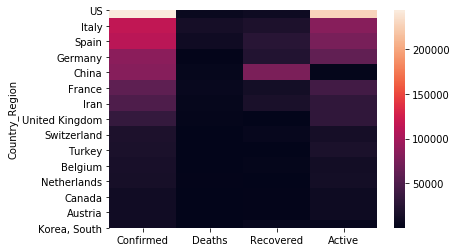

In [14]:
###Show HeatMap
ax = sns.heatmap(df_countries_top15)

In [15]:
###Show Correlation Table between data
df_countries_top15.describe()

,Confirmed,Deaths,Recovered,Active
count,15.000000,15.000000,15.000000,15.000000
mean,58802.866667,3320.800000,13264.866667,42217.200000
std,63257.765307,4085.374685,19559.514239,57593.247006
min,9976.000000,139.000000,192.000000,2545.000000
25%,15068.000000,446.000000,1742.000000,10626.000000
50%,34173.000000,1341.000000,5828.000000,17364.000000
75%,83613.000000,4360.000000,17494.500000,51615.000000
max,243453.000000,13915.000000,76565.000000,228526.000000


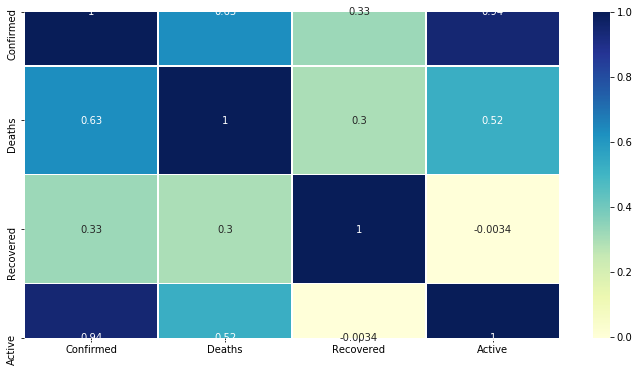

In [16]:
###Show SubPlot Correlation Table
ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_countries_top15.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

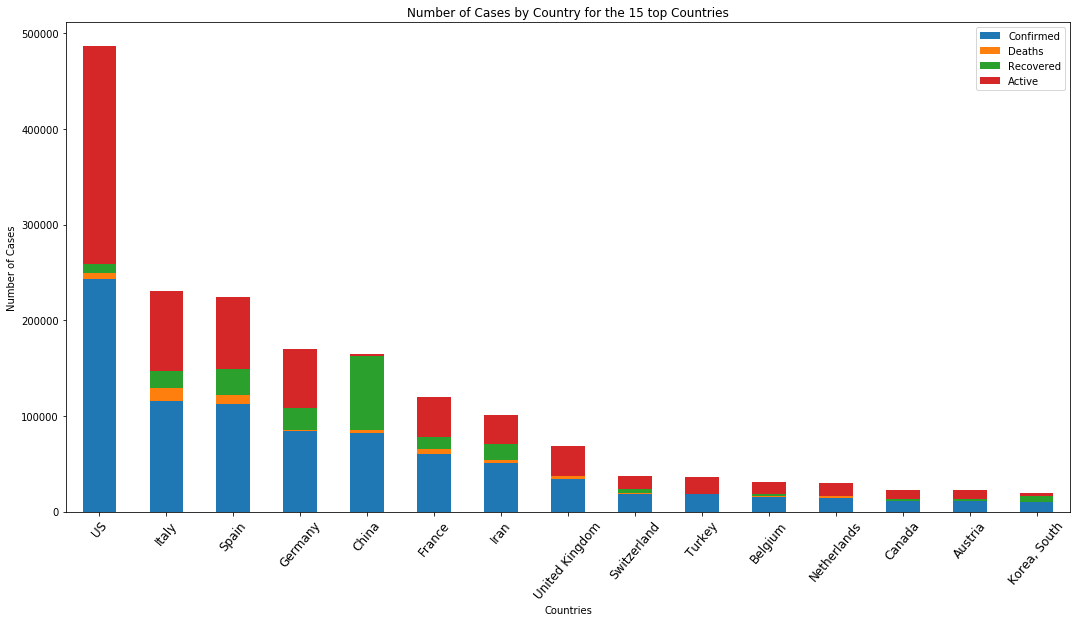

In [17]:
# generate stacked histogram
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=True)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

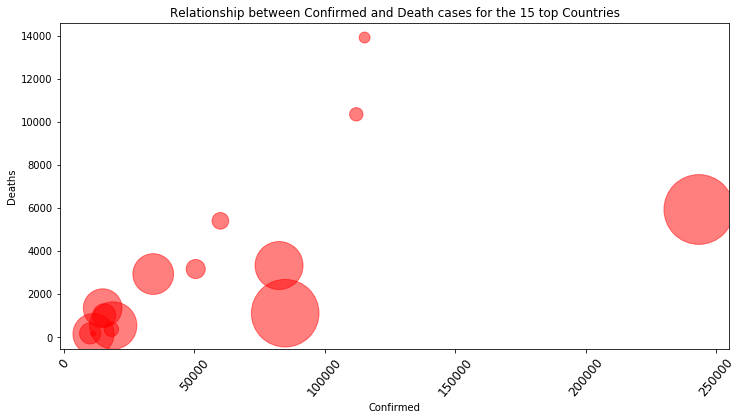

In [18]:
###Generate scatter plot
df_countries_top15.plot(kind='scatter' ,x='Confirmed',y='Deaths', alpha=0.5,color='red', figsize=(12, 6), s=df_countries_top15 /50)
plt.title('Relationship between Confirmed and Death cases for the 15 top Countries')
plt.ylabel('Deaths')
plt.xlabel('Confirmed')
plt.xticks(rotation=50, size=12)
plt.show()

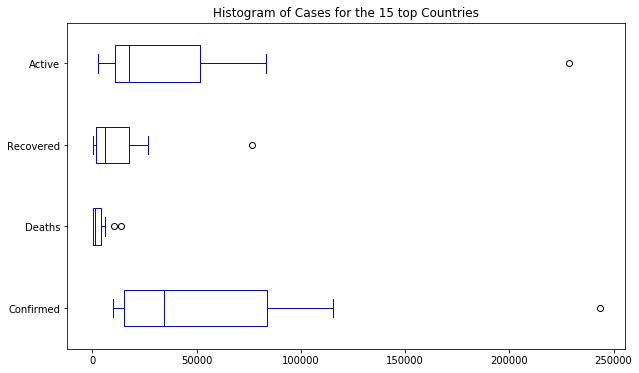

In [19]:
# let's create a boxplot to depict groups of data through their quartiles
count = np.histogram(df_countries_top15, 15)
# un-stacked histogram
df_countries_top15.plot(kind ='box', 
          figsize=(10, 6),
          color='blue', vert=False
         )
plt.title('Histogram of Cases for the 15 top Countries')
plt.show()

In [20]:
df_countries_top15_grouped = df_countries_top15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_top15_grouped = df_countries_top15_grouped.reset_index()

In [21]:
###Countries with most Active cases
temp2 = df_countries_top15_grouped[df_countries_top15_grouped['Active']==0]
temp2 = df_countries_top15_grouped[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
temp2 = df_countries_top15_grouped.sort_values('Active', ascending=False)
temp2.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
13,US,243453,5926,9001,228526
7,Italy,115242,13915,18278,83049
10,Spain,112065,10348,26743,74974
5,Germany,84794,1107,22440,61247
4,France,59929,5398,12548,41983
14,United Kingdom,34173,2926,192,31055
6,Iran,50468,3160,16711,30597
12,Turkey,18135,356,415,17364
11,Switzerland,18827,536,4013,14278
9,Netherlands,14788,1341,260,13187


In [22]:
df_countries_min15 = df_countries.tail(15)

In [23]:
df_countries_min15 = df_countries_min15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_min15 = df_countries_min15.reset_index()

In [25]:
###Countries with less Active cases
temp2 = df_countries_min15[df_countries_min15['Active']==0]
temp2 = df_countries_min15[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
temp2 = df_countries_min15.sort_values('Active', ascending=True)
temp2.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
6,Gambia,4,1,2,1
10,Papua New Guinea,1,0,0,1
11,Saint Vincent and the Grenadines,2,0,1,1
14,Timor-Leste,1,0,0,1
12,Sierra Leone,2,0,0,2
0,Belize,3,0,0,3
2,Botswana,4,1,0,3
3,Burundi,3,0,0,3
5,Central African Republic,3,0,0,3
7,Malawi,3,0,0,3


In [ ]:
####to be continued ....